<a href="https://colab.research.google.com/github/Arjun-254/Synapse_LP/blob/Week-2/SynanpseW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**

## **DJS Synapse Learning Period**
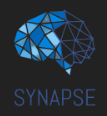

Import the required libraries here. It is always better to keep your imports in one place as it makes your code look neater and allows other users to identify what all you have used.

In [ ]:
# Import numpy, pandas, matplotlib, seaborn
# Your code starts here. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Your code ends here

The dataset that we are going to use for this task has already been provided to you. Download and saved the file in a folder called synapse_w2 in the root of your drive.

Mount your drive and load the dataset the same way you had loaded in the previous task.

In [ ]:
# Your code starts here
from google.colab import drive
drive.mount("/content/gdrive")
# Your code ends here

Mounted at /content/gdrive


In [ ]:
# Your code starts here
df = pd.read_csv("/content/gdrive/MyDrive/synapse_w2/housing_data.csv")
df
# Your code ends here

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


## **1) Linear Regression on Housing Price**

### **EDA: Exploraatory Data Analysis**
**'info()' method to check the data types and number**


In [ ]:
# Your code starts here
df.info()
# Your code ends here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set**

Hint: describe()

In [ ]:
# Your code starts here
df.describe()
#This function gives the mean, std and IQR values.
# And, function excludes the character columns and given summary about numeric columns.
# Your code ends here

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [ ]:
# Your code starts here
for x in df.columns:
  print(x)
# Your code ends here

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization
**The target quantity is price. Let us see its distribution.**

Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

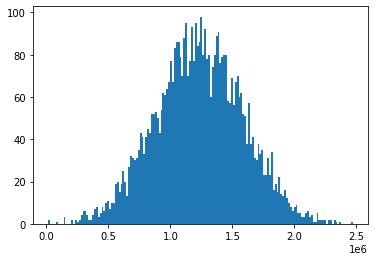

In [ ]:
# Your code starts here
plt.hist(df['Price'],bins=160)
plt.show()
# Your code ends here

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**

Hint: corr()

Google out the meaning of the values you achieve by using this function.

In [ ]:
# Your code starts here
df.corr()
# Your code ends here

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets
Make a list of data frame column names Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"

Then create a new dataframe containing the target (Price) and store it in a variable called "y"

In [ ]:
# Your code starts here
columns=[]
for i in df.columns:
  columns.append(i);
print(columns)
# Your code ends here

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']


In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']].copy()

In [ ]:
y= df[['Price']].copy()

In [ ]:
# This code should print (5000, 5) and (5000,1) if everything is correct
print(X.shape,y.shape)

(5000, 5) (5000, 1)


In [ ]:
# print a few record of X
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
# print a few record of y
y.head()


,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### **Test-train split**
Import train_test_split function from scikit-learn

In [ ]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)

In [ ]:
# Your code starts here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Your code ends here

(3500, 5) (1500, 5) (3500, 1) (1500, 1)


### **Model fit and training**
Import LinearRegression and metrics from scikit-learn

In [ ]:
# Add your import statement here
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object 'lm' by calling LinearRegression()
lm =LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**

Hint: lm.fit()

In [ ]:
# Your code starts here
lm=lm.fit(X_train, y_train)
# Your code ends here

### **Prediction, error estimate, and regression evaluation matrices**
Prediction using the lm model

Use lm.predict() on X_test and store them in a variable called "predictions".
Print type and size of the predictions.

Size should be (1500,) if everything is correct.

In [ ]:
# Your code starts here
predictions=lm.predict(X_test)
predictions.shape
# Your code ends here 

(1500, 1)

Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line

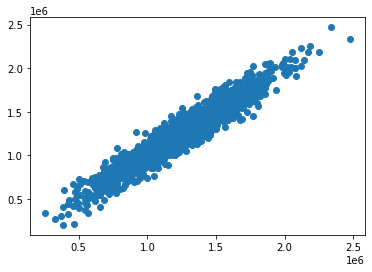

In [ ]:
# Your code starts here
plt.scatter(predictions, y_test)
plt.show;
# Your code ends here

### **Model Evaluation**
Since we are using a regression model here, we cannot use the same metrics we had used during our workshop. The metrics we used then were classification metrics. You can explore different regresion metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [ ]:
# Your code starts here
from sklearn.metrics import mean_squared_error, r2_score
r=r2_score(predictions, y_test)
r=round(r,3)
r
# Your code ends here

0.907

In [ ]:
# You may experiment some other regression metrics here
mean_squared_error(predictions, y_test)

10068422551.400831

# 2) K-nearest neighbor Classification

### Import dataset

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [ ]:
# your code starts here
x= pd.read_csv("/content/gdrive/MyDrive/synapse_w2/classified_data.txt")
df.head()
# your code ends here

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
# your code starts here
df.info()
# your code ends here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
# your code starts here
df.describe()
# your code ends here

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [ ]:
# your code starts here
z=df.columns.values.tolist()
z
# your code ends here

['Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

<function matplotlib.pyplot.show(*args, **kw)>

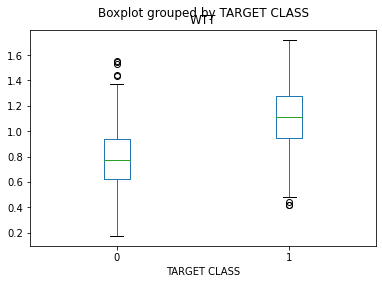

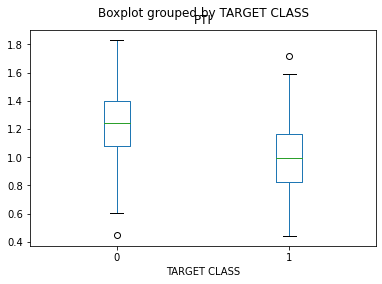

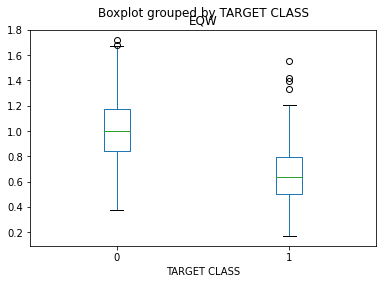

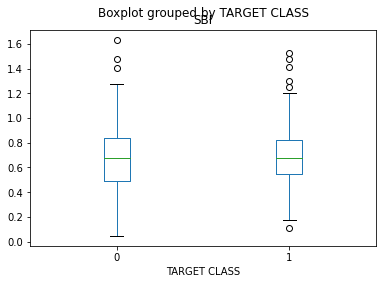

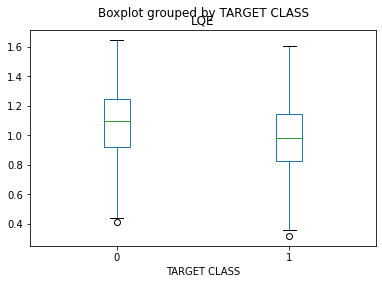

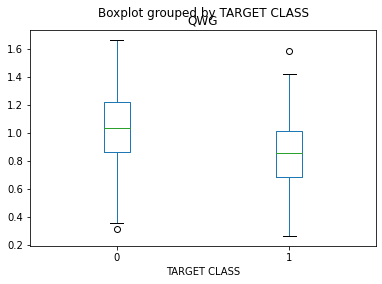

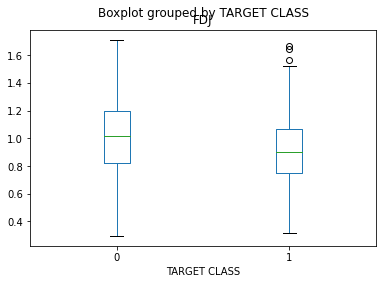

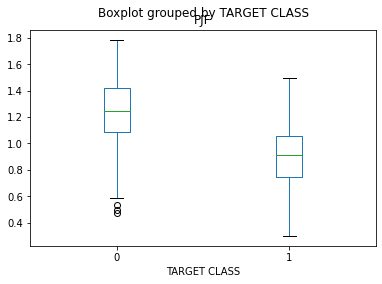

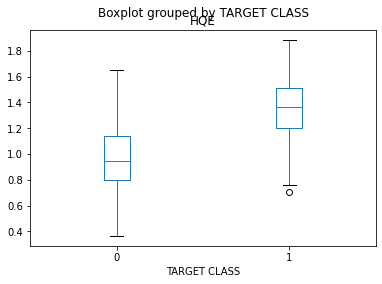

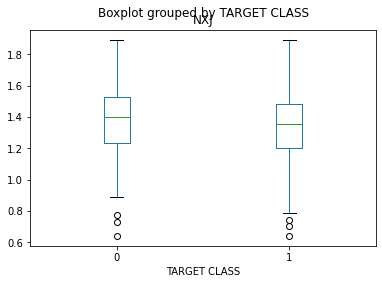

In [ ]:
# your code starts here
for col in df.iloc[:,1:11]:
  df.boxplot(by='TARGET CLASS',column=[col],grid=False)
plt.show

# your code ends here

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
# your code starts here
df1 = df.drop(['TARGET CLASS'],axis=1)
scaler.fit(df1)
scaler.transform(df1)
# your code ends here

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# your code starts here
df_feat = pd.DataFrame(scaler.transform(df1),columns=[z [0:11]])
df_feat
# your code ends here

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
# Your code starts here. 
X = df_feat
y = pd.DataFrame(df['TARGET CLASS'].values)
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here. 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
# Your code ends here

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [ ]:
# Your code starts here. 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
m1 = model.fit(X_train,y_train)
# Your code ends here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# Your code starts here. 
pred = m1.predict(X_test)
# Your code ends here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# Your code starts here. 
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       149
           1       0.90      0.95      0.93       151

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# Your code starts here. 
a= 0
for i in range(len(y_test)):
  if np.array(y_test)[i]==pred[i]:
    a=a+1
a = round(a/float(len(y_test)),3)
a

# Your code ends here

0.923

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
# Your code starts here. 
List=[]
for j in range(1,61):
  model1 = KNeighborsClassifier(n_neighbors=j)
  m2 = model1.fit(X_train,y_train)
  pred1 = m2.predict(X_test)
  a1 = 0
  for i in range(len(y_test)):
    if np.array(y_test)[i]==pred1[i]:
      a1=a1+1
  a1 = round(a1/float(len(y_test)),3)
  List.append(a1)
List
  

# Your code ends here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-package

[0.923,
 0.933,
 0.937,
 0.943,
 0.953,
 0.953,
 0.947,
 0.947,
 0.95,
 0.957,
 0.95,
 0.957,
 0.957,
 0.96,
 0.953,
 0.96,
 0.953,
 0.957,
 0.953,
 0.957,
 0.953,
 0.95,
 0.957,
 0.957,
 0.957,
 0.957,
 0.957,
 0.95,
 0.957,
 0.957,
 0.953,
 0.953,
 0.953,
 0.95,
 0.947,
 0.95,
 0.95,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.947,
 0.95,
 0.95,
 0.95]

**Plot a graph of K value vs Accuracy**

<function matplotlib.pyplot.show(*args, **kw)>

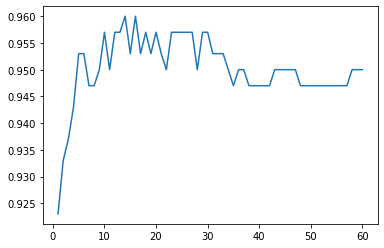

In [ ]:
# Your code starts here. 
count=[]
for i in range(1,61):
  count.append(i);
plt.plot(count,List)
plt.show
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
# Your code starts here. 
maxac=max(List)
neighbours=List.index(maxac)
print('Best N Value is:'+str(neighbours))
print('Max accuracy is :'+str(maxac))

# Your code ends here

Best N Value is:13
Max accuracy is :0.96


In [ ]:
# Reasons: Accoridng to the model best n value is 13.

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Support Vector Machines (SVM).** The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023

